# Statistical Learning - MAE0501 - House Pricing

In this notebook it'll be explored the house pricing data set as a project of the discipline Statistical Learnin from Universidade de São Paulo, taught by Florencia Leonardi.

# Summary

1. Data set introduction and treatment
2. Descriptive Analysis
3. Statistical Modelling
4. Diagnostic
5. Prediction and Test
6. Conclusion

In [169]:
import pandas as pd
import numpy as np
import missingno as missno
from plotnine import *
import scipy.stats
import seaborn as sb
from plotly.tools import mpl_to_plotly as ggplotly

### Functions used in this notebook

In [217]:
def missing_value(data):
    ## Returns a DataFrame containing the variables with missing values and its porcentage and quantity
    soma_na2 = pd.DataFrame(data.isna().sum()).rename_axis("Variables").reset_index().rename(columns={0: 'Missing_Quantity'})

    soma_na2['Porcentage'] = soma_na2.loc[soma_na2['Missing_Quantity'] != 0].groupby('Variables')['Missing_Quantity'].transform(lambda x: x/len(data))

    tbl_na = soma_na2.loc[soma_na2['Porcentage'].notna()].sort_values(by = ['Porcentage'], ascending = False)
    return (tbl_na)


In [171]:
def check_na_value(data, cat_feature, num_feature):
    ## returns if the nrows of the categorical feature with NaN is equal to nrows of the inner join of categorical feature with NaN 
    ## and its correspondant numerical feature equal to 0
    
    return [cat_feature, data.loc[(data[num_feature] == 0)&(data[cat_feature].isna())].shape[0], data.loc[data[cat_feature].isna()].shape[0]]

## 1. Data set introduction and treatment

In [228]:
train_data = pd.read_csv('~\\OneDrive\\Documentos\\stat_learning\\Projeto\\DADOS\\train.csv')
test_data = pd.read_csv('~\\OneDrive\\Documentos\\stat_learning\\Projeto\\DADOS\\test.csv')
all_data = pd.concat([train_data.drop(['SalePrice'], axis=1), test_data], axis=0)

### Informação da base de dados

In [229]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [230]:
all_data.nunique()

Id               2919
MSSubClass         16
MSZoning            5
LotFrontage       128
LotArea          1951
                 ... 
MiscVal            38
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
Length: 80, dtype: int64

In [231]:
all_data.dropna(axis=1)

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,1,60,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,0,61,0,0,0,0,0,2,2008,Normal
1,2,20,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,298,0,0,0,0,0,0,5,2007,Normal
2,3,60,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0,42,0,0,0,0,0,9,2008,Normal
3,4,70,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,0,35,272,0,0,0,0,2,2006,Abnorml
4,5,60,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,192,84,0,0,0,0,0,12,2008,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,0,0,0,0,0,0,0,6,2006,Normal
1455,2916,160,1894,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,0,24,0,0,0,0,0,4,2006,Abnorml
1456,2917,20,20000,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,474,0,0,0,0,0,0,9,2006,Abnorml
1457,2918,85,10441,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,80,32,0,0,0,0,700,7,2006,Normal


Dropping columns with NA values, we can se that remains 46 features, losing almost 25% of the original data set. So in the next section I'm going to analyze the missing values.

### Data Treatment

#### Missing values

##### Training data


In [232]:
missing_value(all_data)
## for var, porc in zip(var_na['variaveis'], var_na['porc_na']):
##     template = 'Column "{0}" has {1:.2%} missing values'
##     print(template.format(var, porc))

,Variables,Missing_Quantity,Porcentage
72,PoolQC,2909,0.996574
74,MiscFeature,2814,0.964029
6,Alley,2721,0.932169
73,Fence,2348,0.804385
57,FireplaceQu,1420,0.486468
3,LotFrontage,486,0.166495
60,GarageFinish,159,0.054471
63,GarageQual,159,0.054471
64,GarageCond,159,0.054471
59,GarageYrBlt,159,0.054471


In some cases, the NA value in the variable is refered to an actual categoric value, for example, in the **Alley** feature the NA represents *no alley acces*. However, some of them might be a real missing data. For example, for **PoolArea** equl 0, the value of **PoolQC** is not a missing value. Thus, I'm going to analyse those cases.

In [233]:
columns_to_verify = pd.DataFrame(
    {
        'cat_columns': ['PoolQC','MiscFeature', 'FireplaceQu', 'BsmtFinType1', 'BsmtFinType2'],
        'num_columns': ['PoolArea', 'MiscVal', 'Fireplaces', 'BsmtFinSF1', 'BsmtFinSF2']
    }
)
df_check_na = []
for cat, num in zip(columns_to_verify['cat_columns'], columns_to_verify['num_columns']):
    temp = check_na_value(all_data, cat, num)
    df_check_na.append(temp)

pd.DataFrame(df_check_na).rename(columns={0: 'Categorical Feature', 1: 'Nrows Cat NaN and Num 0', 2: 'Nrows Cat NaN'})

,Categorical Feature,Nrows Cat NaN and Num 0,Nrows Cat NaN
0,PoolQC,2906,2909
1,MiscFeature,2813,2814
2,FireplaceQu,1420,1420
3,BsmtFinType1,78,79
4,BsmtFinType2,78,80


We can see that, most of the missing values in the categorical feature is actually a categorical value. So in those cases I'm going to replace the NaN value by a categorical value.

In [234]:
all_data.loc[(all_data.PoolQC.isna())&(all_data.PoolArea == 0), ['PoolQC']] = 'NoPool'
all_data.loc[(all_data.MiscFeature.isna())&(all_data.MiscVal == 0), ['MiscFeature']] = 'NoMisc'
all_data.loc[(all_data.FireplaceQu.isna())&(all_data.Fireplaces == 0), ['FireplaceQu']] = 'NoFireplace'
all_data.loc[(all_data.BsmtFinType1.isna())&(all_data.BsmtFinSF1 == 0), ['BsmtFinType1']] = 'NoBsmtFinType1'
all_data.loc[(all_data.BsmtFinType2.isna())&(all_data.BsmtFinSF2 == 0), ['BsmtFinType2']] = 'NoBsmtFinType2'
all_data.loc[(all_data.GarageType.isna())&(all_data.GarageYrBlt.isna()), ['GarageType', 'GarageYrBlt']] = 'NoGarage'
all_data.loc[(all_data.GarageType == 'NoGarage')&(all_data.GarageFinish.isna()), ['GarageType', 'GarageFinish']] = 'NoGarage'
all_data.loc[(all_data.GarageType == 'NoGarage')&(all_data.GarageQual.isna()), ['GarageType', 'GarageQual']] = 'NoGarage'
all_data.loc[(all_data.GarageType == 'NoGarage')&(all_data.GarageCond.isna()), ['GarageType', 'GarageCond']] = 'NoGarage'
all_data.loc[(all_data.BsmtFinType1 == 'NoBsmtFinType1')&(all_data.BsmtQual.isna()), ['BsmtQual']] = 'NoBasement'
all_data.loc[(all_data.BsmtFinType1 == 'NoBsmtFinType1')&(all_data.BsmtCond.isna()), ['BsmtCond']] = 'NoBasement'
all_data.loc[(all_data.BsmtFinType1 == 'NoBsmtFinType1')&(all_data.BsmtExposure.isna()), ['BsmtExposure']] = 'NoBasement'
all_data.loc[(all_data.Alley.isna()), ['Alley']] = 'NoAlley'
all_data.loc[(all_data.Fence.isna()), ['Fence']] = 'NoFence'
missing_value(all_data)

,Variables,Missing_Quantity,Porcentage
3,LotFrontage,486,0.166495
25,MasVnrType,24,0.008222
26,MasVnrArea,23,0.007879
2,MSZoning,4,0.001370
31,BsmtCond,4,0.001370
32,BsmtExposure,4,0.001370
72,PoolQC,3,0.001028
30,BsmtQual,3,0.001028
35,BsmtFinType2,2,0.000685
48,BsmtHalfBath,2,0.000685


In [238]:
all_data['MasVnrType'].mode()[0]

'None'

In [239]:
columns_na = missing_value(all_data)['Variables']
for col in columns_na:
    if all_data[col].dtype == 'O':
        all_data[col].fillna(all_data[col].mode()[0], inplace=True)
    else:
        all_data[col].fillna(all_data[col].median(), inplace=True)

missing_value(all_data)


,Variables,Missing_Quantity,Porcentage


#### Categorical variables

Transforming the categorical variables into numeric values:


In [114]:
column_names = train_data.columns.to_list()
for col in column_names:
    if train_data[col].dtype == 'O':
        train_data[col] = pd.factorize(train_data[col])[0]
    
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   Alley          1460 non-null   int64  
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   int64  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int64  
 13  Condition1     1460 non-null   int64  
 14  Condition2     1460 non-null   int64  
 15  BldgType       1460 non-null   int64  
 16  HouseStyle     1460 non-null   int64  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Some plots

#### Target Variable Density Plot

For the plots, I'm going to use **plotnine**, since I have more familiarity with **ggplot2** from R.

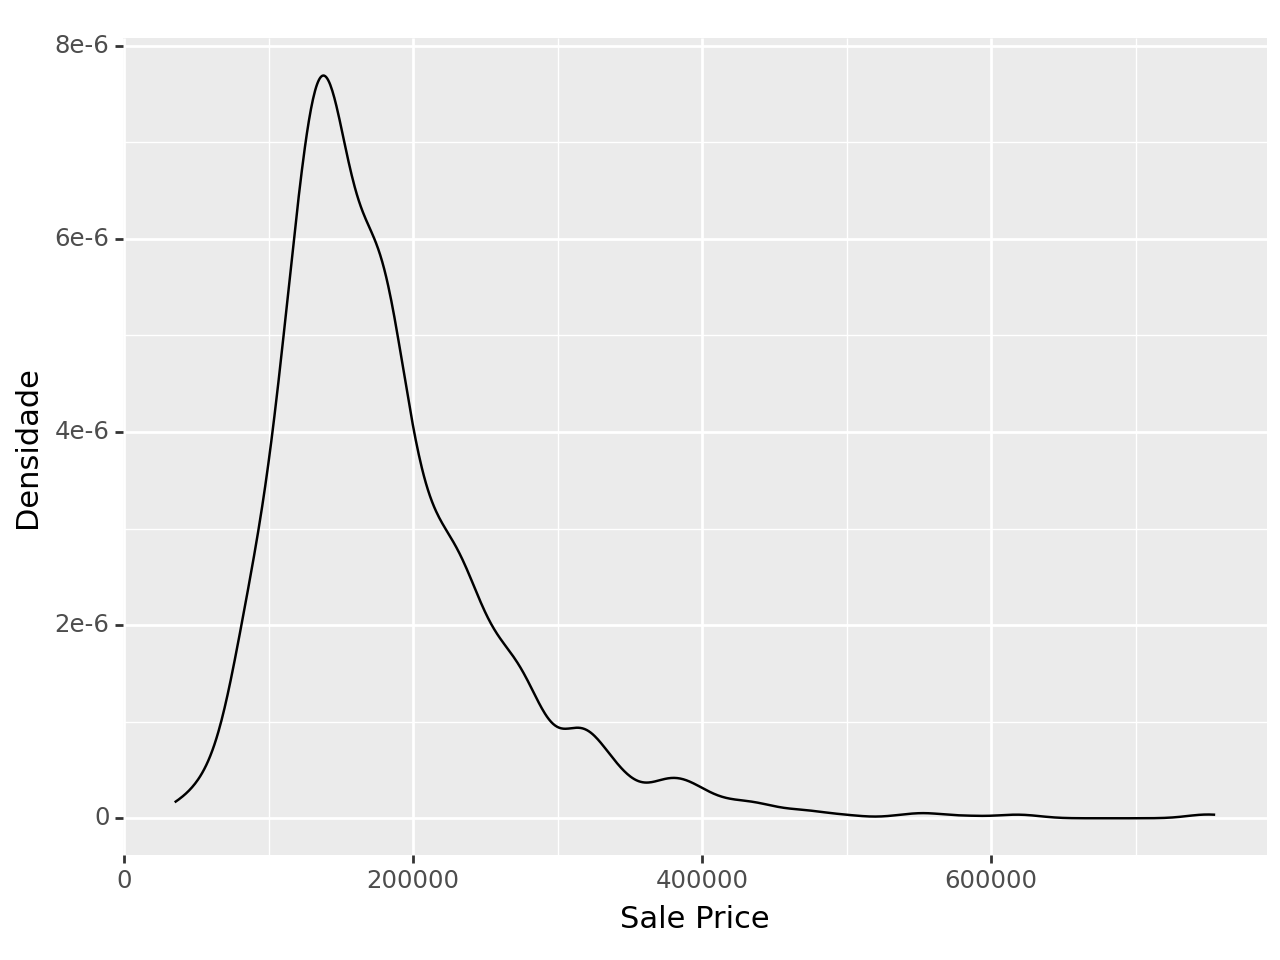

<Figure Size: (640 x 480)>

In [115]:
(
    ggplot(train_data)
        +geom_density(aes(x = "SalePrice"))
        +labs(x = "Sale Price", y = "Densidade")
)

To see if the **Sale Price** have approximadetly a Guassian Distribution, lets see the Skewness and Kurtosis of its data.

- Skewness measures the assymetry of a distribution and its definition is given by:

$$
A(X) = E\left[\frac{(X-\mu)^{3}}{\sigma^{3}}\right]
$$      

And its estimation is given by:

$$
\hat{A}(X) = \frac{1}{N\sigma^{3}}\sum_{n=1}^{N} (X_{n} - \bar{X})
$$

Where the Normal Distribution have A(X) = 0.

- Kurtosis measures the flatness and peakness of a distribution and its definition is given by:

$$
K(X) = E\left[\frac{(X-\mu)^{4}}{\sigma^{4}}\right]
$$

And its estimation is given by:

$$
\hat{X} = \frac{1}{N\sigma^{4}}\sum_{n=1}^{N} (X_{n}-\bar{X})^{4}
$$

Where the Normal Distribution have K(X) = 3.

In [116]:
print('Skewness:', train_data.SalePrice.skew(), '\nKurtosis: ', train_data.SalePrice.kurtosis())

Skewness: 1.8828757597682129 
Kurtosis:  6.536281860064529


We can observe that both the measurement are quite far from the Normal Distribution value, indicating that a linear regression might be not the best approach since its assumption is related to that.

### Correlation

#### Target x Features

In [117]:
train_data.corr(method='spearman')['SalePrice'].to_frame().abs().sort_values(by=['SalePrice'], ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.809829
GrLivArea,0.731310
GarageCars,0.690711
YearBuilt,0.652682
...,...
LandContour,0.026491
Id,0.018546
Utilities,0.016710
BsmtHalfBath,0.012189


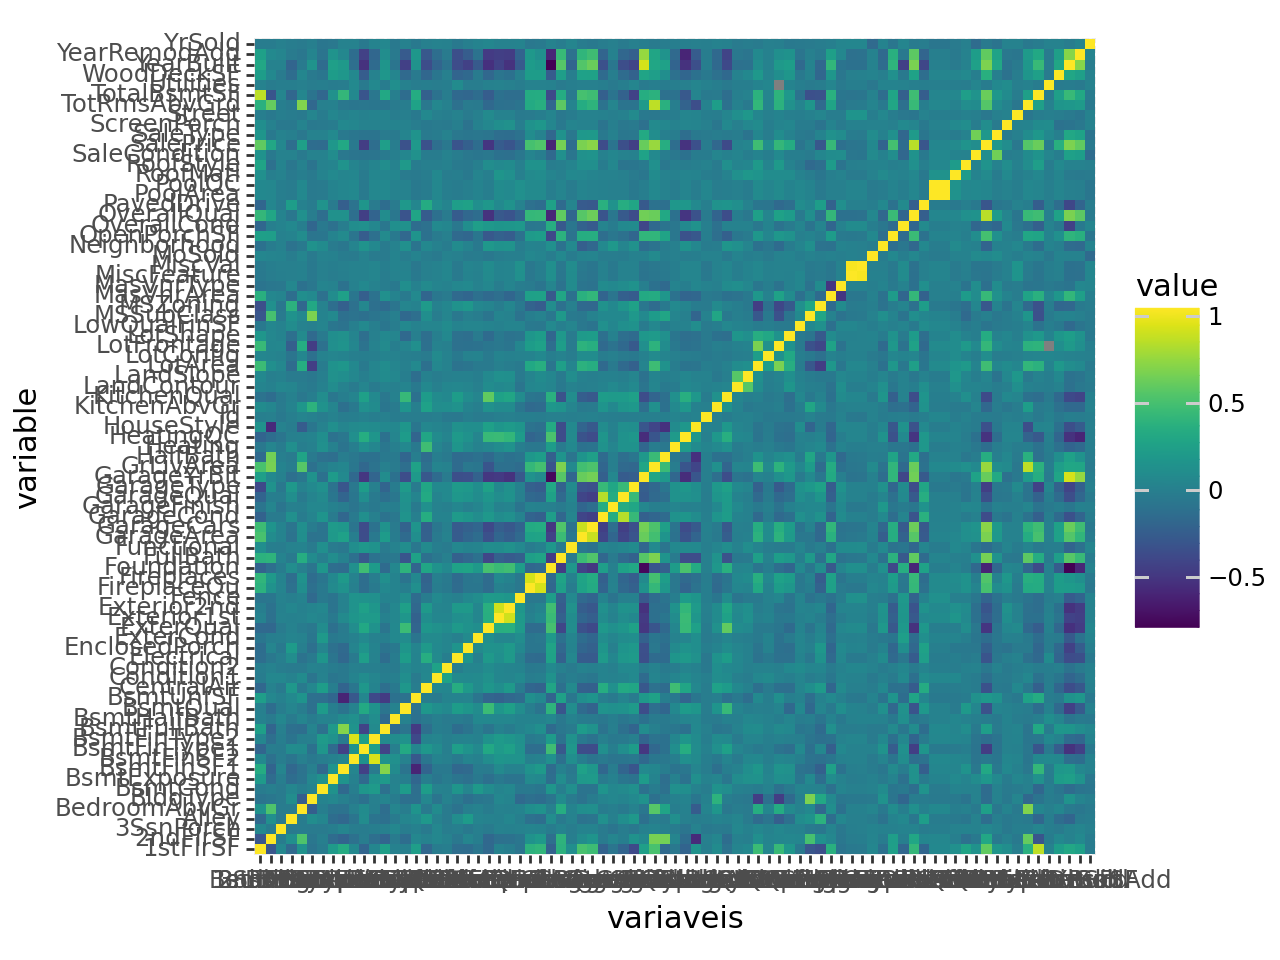

<Figure Size: (640 x 480)>

In [118]:
##cor_spearman = dados_wo_missing.corr(method = 'spearman')
##
##numeric_data = train_data[train_data.columns[train_data.dtypes != 'object']]

cor = train_data.corr(method = 'spearman')

cor.index.name = 'variaveis'

cor.reset_index(inplace=True)

correlacao_melt = pd.melt(cor, id_vars=['variaveis'], value_vars=cor.columns.to_list()[1:])

g1 = (ggplot(correlacao_melt)+
 geom_tile(aes(x = "variaveis", y = "variable", fill = "value")))

g1